# Curves for Linearly uncoupled Resonators for OPO

In [52]:
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import numpy as np
from scipy.special import fresnel
from scipy import special


def euler_bend_S4(theta, R, n, num_points):

    k= 1/(theta**n*R**(n+1)*(n+1)**n)   
    s_f = (theta*(n+1)/k )**(1/(n+1))   
    s = np.linspace(0, s_f, num_points)

    x1=np.array([])
    y1=np.array([])

    for j in range(0,len(s)):
        x=integrate.quad(lambda l: np.cos(k*l**(n+1)/(n+1)), 0, s[j])[0]
        x1=np.append(x1,x)
        y=integrate.quad(lambda l: np.sin(k*l**(n+1)/(n+1)), 0, s[j])[0]
        y1=np.append(y1,y)
    
    print("Length of the single Euler:",s_f)
    print("x-span of the single Euler",x1[-1])
    print("y-span of the single Euler",y1[-1])

    x2, y2 = np.dot(np.array([[np.cos(2*theta), np.sin(2*theta)], [-np.sin(2*theta), np.cos(2*theta)]]), np.stack([x1, y1], 0))

    x2, y2 = -x2[::-1], y2[::-1]

    x2, y2 = x2-x2[0]+x1[-1], y2-y2[0]+y1[-1]

    x21 = np.concatenate([x1, x2], 0)
    y21 = np.concatenate([y1, y2], 0)

    print("x-span of the first two Euler",x21[-1])
    print("y-span of the first two Euler",y21[-1])

    x2, y2 = np.dot(np.array([[-1, 0], [0, -1]]), np.stack([x21, y21], 0))
  
    x2, y2 = x2[::-1], y2[::-1]
  
    x2, y2 = x2- x2[0]+x21[-1], y2-y2[0]+y21[-1]
    x = np.concatenate([x21, x2], 0)
    y = np.concatenate([y21, y2], 0)
    print('Total length of 4-Euler=',4*s_f)

    return x, y




def euler_bend_S4_addL(theta, R, n, num_points):

    k= 1/(theta**n*R**(n+1)*(n+1)**n)   
    s_f = (theta*(n+1)/k )**(1/(n+1))   
    s = np.linspace(0, s_f, num_points)

    x1=np.array([])
    y1=np.array([])

    for j in range(0,len(s)):
        x=integrate.quad(lambda l: np.cos(k*l**(n+1)/(n+1)), 0, s[j])[0]
        x1=np.append(x1,x)
        y=integrate.quad(lambda l: np.sin(k*l**(n+1)/(n+1)), 0, s[j])[0]
        y1=np.append(y1,y)
    
    print("Length of the single Euler:",s_f)
    print("x-span of the single Euler",x1[-1])
    print("y-span of the single Euler",y1[-1])

    x2, y2 = np.dot(np.array([[np.cos(2*theta), np.sin(2*theta)], [-np.sin(2*theta), np.cos(2*theta)]]), np.stack([x1, y1], 0))

    x2, y2 = -x2[::-1], y2[::-1]

    x2, y2 = x2-x2[0]+x1[-1], y2-y2[0]+y1[-1]

    x21 = np.concatenate([x1, x2], 0)
    y21 = np.concatenate([y1, y2], 0)

    print("x-span of the first two Euler",x21[-1])
    print("y-span of the first two Euler",y21[-1])

    x_L=(x21[-1],x21[-1]+1.63)
    y_L=np.tan(2*theta)*(x_L-x21[-1])+y21[-1]

    x21 = np.concatenate([x21, x_L], 0)
    y21 = np.concatenate([y21, y_L], 0)

    x2, y2 = np.dot(np.array([[-1, 0], [0, -1]]), np.stack([x21, y21], 0))
  
    x2, y2 = x2[::-1], y2[::-1]
  
    x2, y2 = x2- x2[0]+x21[-1], y2-y2[0]+y21[-1]
    x = np.concatenate([x21, x2], 0)
    y = np.concatenate([y21, y2], 0)
    print('Total length of 4-Euler with additional straight length=',4*s_f+1.76)

    return x, y





def euler_bend_Hybrid_180(Reff, p, num_points): 
    a=0
    k=(2*np.sqrt(2)*(integrate.quad(lambda t: np.sin(t**2), 0, np.sqrt(np.pi*p/2))[0])+2/np.sqrt(np.pi*p)*np.sin(np.pi*(1-p)/2))**2/(2*Reff)**2
    
    s_p=np.linspace(0, np.sqrt(np.pi*p/k), num_points//2)
    x_data=np.array([])
    y_data=np.array([])

    for j in range(0,len(s_p)):
        x=integrate.quad(lambda l: np.cos(k*l**2/(2)), a, s_p[j])[0]
        x_data=np.append(x_data,x)
        y=integrate.quad(lambda l: np.sin(k*l**2/(2)), a, s_p[j])[0]
        y_data=np.append(y_data,y)
    
    print(f"Length of the first Euler: {s_p[-1]:.2f}")
    print(f"x-span of the first Euler: {x_data[-1]:.2f}")
    print(f"y-span of the first Euler: {y_data[-1]:.2f}")
    x0=x_data[-1]-np.sin(np.pi*p/2)/np.sqrt(k*np.pi*p)

    x2_data, y2_data = np.dot(np.array([[-1, 0], [0, -1]]), np.stack([x_data, y_data], 0))

    x2_data, y2_data = -x2_data[::-1], y2_data[::-1]

    x2_data, y2_data = x2_data, y2_data + 2*Reff

    theta = np.linspace( -(-p+1)*np.pi/2, (-p+1)*np.pi/2 , 150 )
    radius = 1/np.sqrt(k*np.pi*p)
    a = (radius * np.cos( theta ))+x0
    b = (radius * np.sin( theta ))+Reff

    print(f"Circular bend of radius {np.round(radius, 2)}, centered at ({np.round(x0, 2)}, {np.round(Reff, 2)}), for an angle of {np.round(((-p+1)*np.pi)*180/np.pi, 2)}°")

    x_data1 = np.concatenate([x_data, a,x2_data], 0)
    y_data1 = np.concatenate([y_data, b,y2_data], 0)

    s_f= 2*np.sqrt(np.pi*p/k)+radius*(-p+1)*np.pi
    print(f'Total length of the Hybrid-Euler with p={p:.2f}: {s_f:.2f} um')
    return x_data1,y_data1,radius,x_data[-1],y_data[-1]


Length of the single Euler: 19.634954084936208
x-span of the single Euler 19.55939015966759
y-span of the single Euler 1.281570161834475
x-span of the first two Euler 38.12034606493465
y-span of the first two Euler 7.582608281107981
Total length of 4-Euler= 78.53981633974483


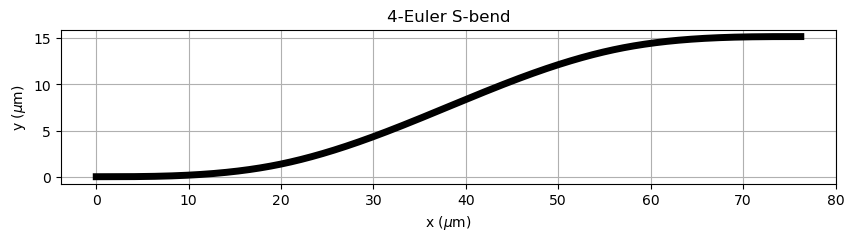

In [53]:
x1, y1= euler_bend_S4(np.pi/16,50,1,1000)

plt.figure(figsize=(10, 6))
plt.plot(x1,y1,label='$\Theta=\pi/8$',color='k',linewidth=5)
plt.axis('scaled')

plt.title("4-Euler S-bend")
plt.xlabel("x ($\mu$m)")
plt.ylabel("y ($\mu$m)")
plt.grid()

plt.show()


Length of the single Euler: 19.634954084936208
x-span of the single Euler 19.55939015966759
y-span of the single Euler 1.281570161834475
x-span of the first two Euler 38.12034606493465
y-span of the first two Euler 7.582608281107981
Total length of 4-Euler with additional straight length= 80.29981633974484


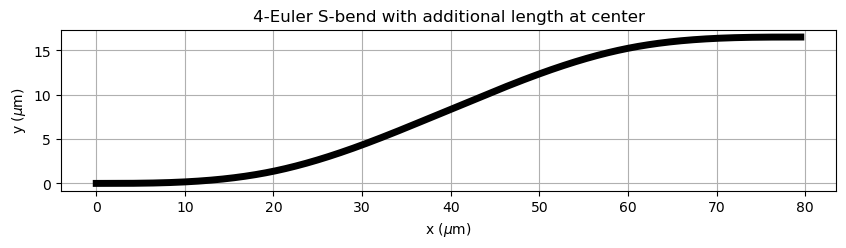

In [54]:
x1, y1= euler_bend_S4_addL(np.pi/16,50,1,1000)

plt.figure(figsize=(10, 6))
plt.plot(x1,y1,label='$\Theta=\pi/8$',color='k',linewidth=5)
plt.axis('scaled')

plt.title("4-Euler S-bend with additional length at center")
plt.xlabel("x ($\mu$m)")
plt.ylabel("y ($\mu$m)")
plt.grid()

plt.show()


Length of the first Euler: 94.21
x-span of the first Euler: 86.18
y-span of the first Euler: 27.77
Circular bend of radius 49.98, centered at (45.75, 57.15), for an angle of 72.0°
Total length of the Hybrid-Euler with p=0.60: 251.23 um


Text(0.5, 1.0, 'U_bend')

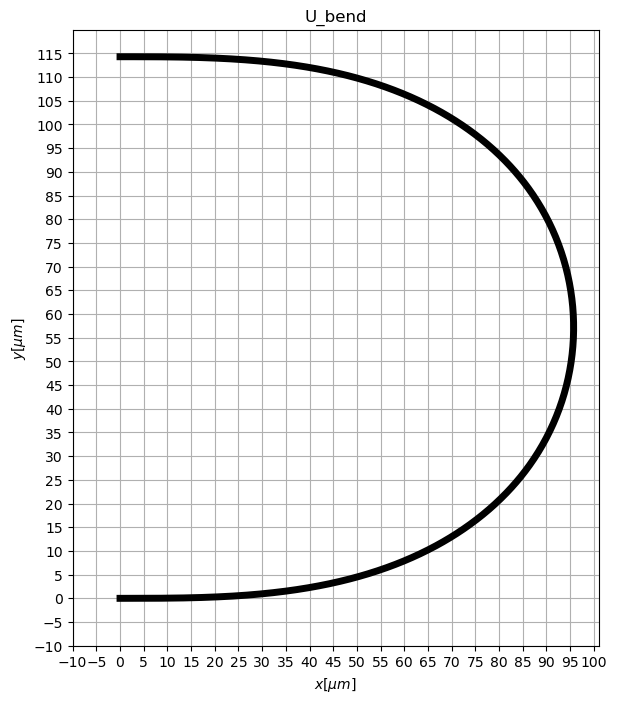

In [56]:
x2, y2,radius,x_E,y_E=euler_bend_Hybrid_180(57.15, 0.6 ,1000)

plt.figure(figsize=(8, 8))
plt.plot(x2,y2,label='p=0.6', color='k',linewidth=5)
plt.axis('scaled')
plt.xlim(-10, 101)
plt.ylim(-10,120)

plt.xticks(np.arange(-10, 101, 5))
plt.yticks(np.arange(-10, 120, 5))
plt.xlabel("$x[\mu m]$")
plt.ylabel("$y[\mu m]$")
plt.grid()
plt.title("U_bend")
#put more tickz in the plot